## Bank Account Fraud Supplementary Code
Using this as supplementary testing for Bank Account Fraud main notebook. Will run logistic regression and SMOTE.

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Load in Bank Account Fraud File and save as data frame before only keeping columns with Numeric Values.

In [2]:
# Load a compressed csv file
baf_base = pd.read_csv('files/Base.csv')  

# Print the first five rows of data
baf_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Convert to numeric only data frame
Preview the columns and variables we will work with

In [ ]:
# Count the number of fraudulent/infraudulent purchases
baf_base['fraud_bool'].value_counts()
baf_num = baf_base.select_dtypes(include=np.number)
baf_num

## Predictor and target variables

Using train test split, with the target being the variable that tells if the account is fradulent.

In [ ]:
# Your code here
y = baf_num['fraud_bool']
X = baf_num.drop(columns=['fraud_bool'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Show counts of train and test sets.

In [5]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

fraud_bool
0    741709
1      8291
Name: count, dtype: int64


fraud_bool
0    247262
1      2738
Name: count, dtype: int64


## Make a basic logisitic regression model

Will plot the ROC curve and print AUC after


AUC: 0.8006274698585099


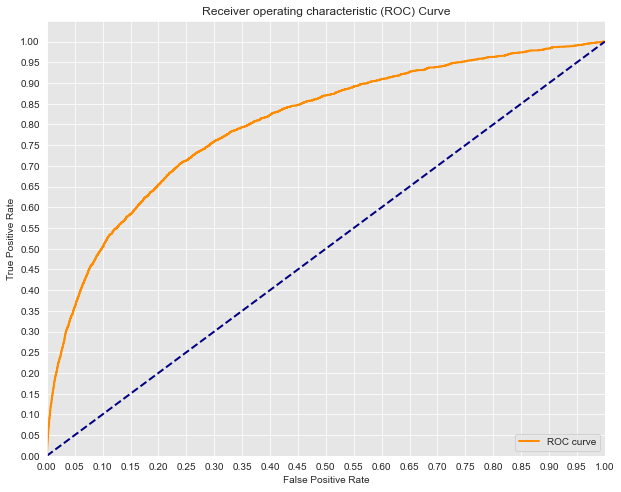

In [6]:
# Initial Model
logr = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logr.fit(X_train, y_train).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Make pred the prediction and create a confusion matrix after.

In [7]:
# Pred
pred = logr.predict(X_test)

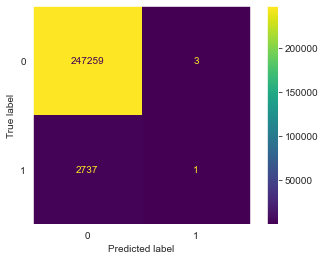

In [8]:
# Plot confusion matrix of the test set 
cm = confusion_matrix(y_test, pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.grid(False)
plt.show()

## Tuning model

Try to test different parameters. Only leave the one highlighted for time as each run may take a few minutes.

AUC for 0.001: 0.7996209829719073
AUC for 0.01: 0.8088203273249358
AUC for 0.1: 0.8125352261917
AUC for 1: 0.8006274698585099
AUC for 10: 0.8106416388281538
AUC for 100: 0.8121037999699369


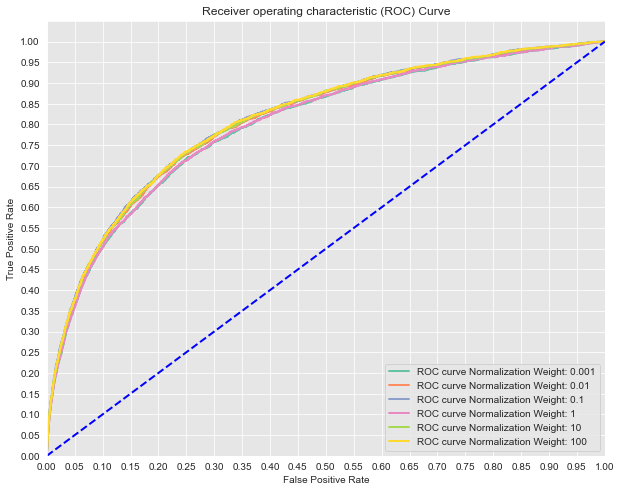

In [9]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001]
#C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    logr = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logr.fit(X_train, y_train)

    y_hat_test = logr.predict(X_test)
    y_score = logr.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### SMOTE

SMOTE to compare different performance and check for improvements.

In [10]:
#pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


fraud_bool
0    741709
1      8291
Name: count, dtype: int64


fraud_bool
0    741709
1    741709
Name: count, dtype: int64


<AxesSubplot:>

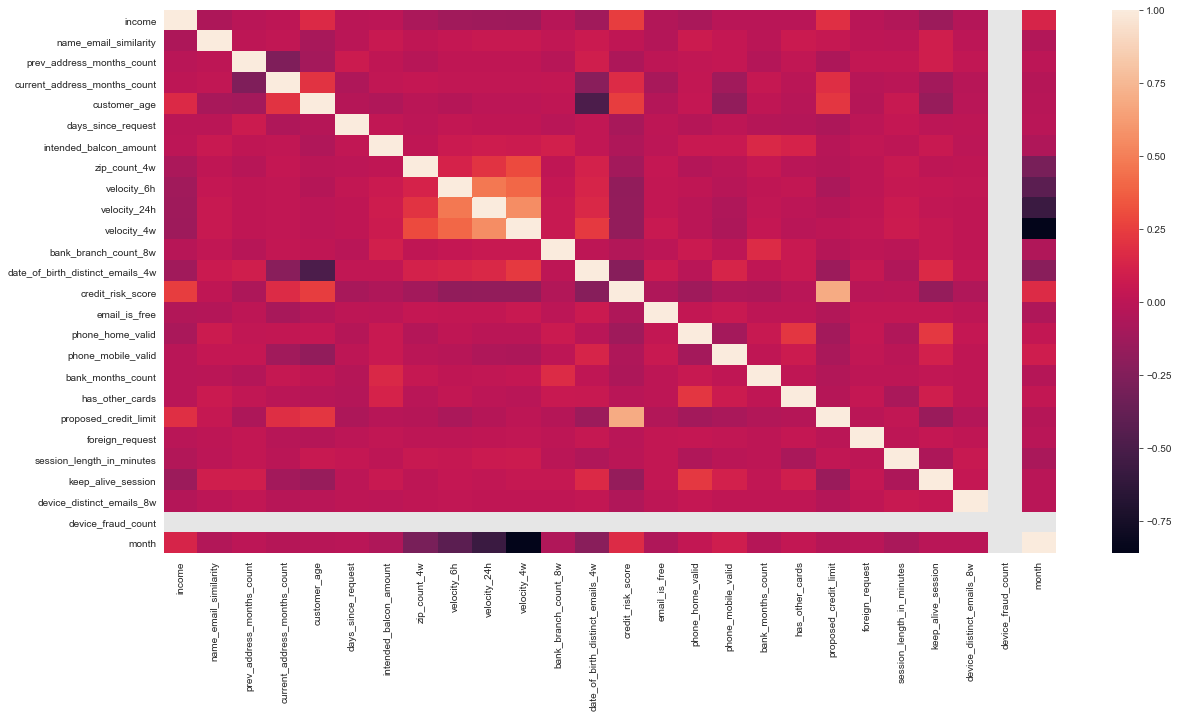

In [11]:
# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(X_train_resampled.corr())

Same as before, only leaving one parameter active for time when rerunning.

In [ ]:
# Now let's compare a few different regularization performances on the dataset
C_param_range = [0.005]
#C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

# Write a for loop that builds models for each value of C_param_range, prints the AUC and plots the ROC
for n, c in enumerate(C_param_range):
    logr = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logr.fit(X_train_resampled, y_train_resampled)

    y_hat_test = logr.predict(X_test)
    y_score = logr.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr))) 
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Values very similiar. Some adjustments needed. Will also have to consider the few non-numerical variables in the original data set and their possible effect.

In [ ]:
# Previous original class distribution
print(y.value_counts()) 
X_resampled, y_resampled = SMOTE().fit_resample(X, y) 
# Preview synthetic sample class distribution
print('---------------------------------')
print(pd.Series(y_resampled).value_counts()) 

# Split resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('----------------------------------------------')
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64
---------------------------------
fraud_bool
0    988971
1    988971
Name: count, dtype: int64
----------------------------------------------
AUC for 0.005: 0.9295510926441957
----------------------------------------------
AUC for 0.1: 0.9293518716799452
----------------------------------------------
AUC for 0.2: 0.9295663978503877
